In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, feature, color, exposure, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import blob_log, blob_dog
from math import sqrt

# Reload the image and preprocess
from skimage import img_as_float
image = imread('/content/platelet.jpg')
gray = rgb2gray(image)
image_eq = exposure.equalize_adapthist(gray, clip_limit=0.03)

# Detect blobs using Laplacian of Gaussian
blobs_log = blob_log(image_eq, max_sigma=10, num_sigma=10, threshold=0.2)

# Compute radii in the 3rd column
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)


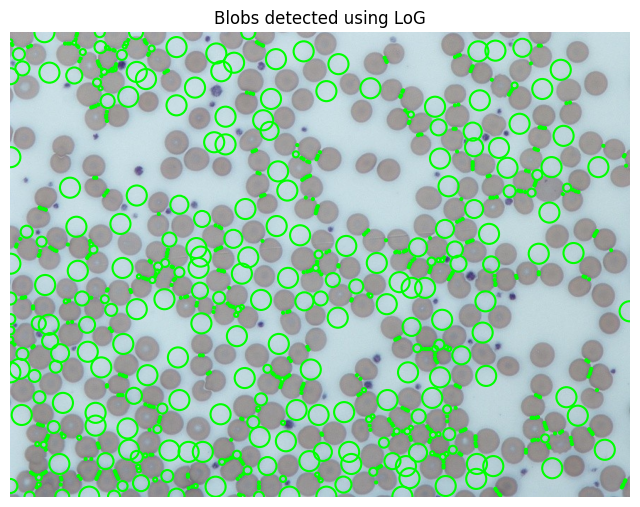

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, cmap='gray')
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='lime', linewidth=1.5, fill=False)
    ax.add_patch(c)
ax.set_title('Blobs detected using LoG')
ax.axis('off')
plt.show()


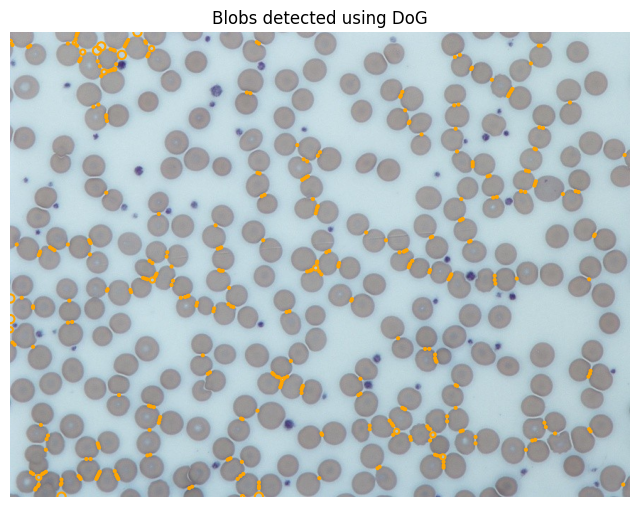

In [ ]:
# Detect blobs using DoG
blobs_dog = blob_dog(image_eq, max_sigma=5, threshold=0.2)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, cmap='gray')
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='orange', linewidth=1.5, fill=False)
    ax.add_patch(c)
ax.set_title('Blobs detected using DoG')
ax.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, feature, color, exposure
from skimage.io import imread
from skimage.color import rgb2gray

# Load the image
url = '/content/platelet.jpg'
image = imread(url)
gray = rgb2gray(image)

# Enhance contrast
image_eq = exposure.equalize_adapthist(gray, clip_limit=0.03)


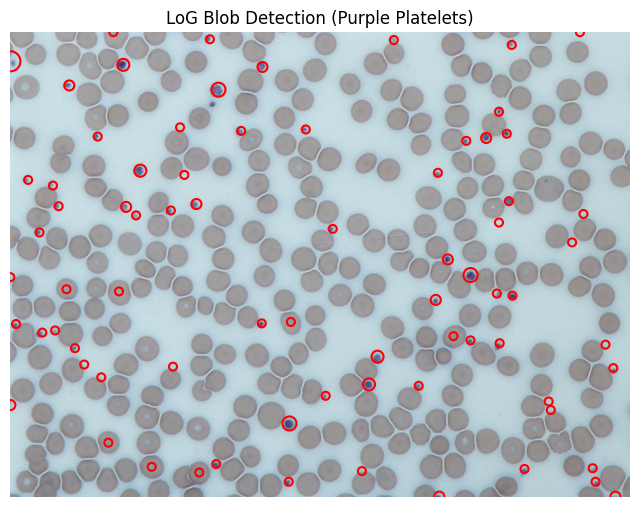

In [ ]:


# Convert to HSV for better color-based processing
hsv = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2HSV)

# Extract Saturation and Value channels
saturation = hsv[:, :, 1]
value = hsv[:, :, 2]

# Adaptive Histogram Equalization to enhance contrast
saturation_eq = exposure.equalize_adapthist(saturation, clip_limit=0.03)
value_eq = exposure.equalize_adapthist(value, clip_limit=0.03)

# Merge enhanced channels for better platelet detection
enhanced_image = (saturation_eq + value_eq) / 2

# Apply Laplacian of Gaussian (LoG) for Blob Detection
blobs_log = blob_log(enhanced_image, min_sigma=4, max_sigma=10, num_sigma=7, threshold=0.1)

# Convert radii to correct scale
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

# Plot detected blobs with red circles
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, cmap='gray')
ax.set_title('LoG Blob Detection (Purple Platelets)')
ax.axis('off')

# Draw red circles around detected blobs
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=1.5, fill=False)
    ax.add_patch(c)

plt.show()

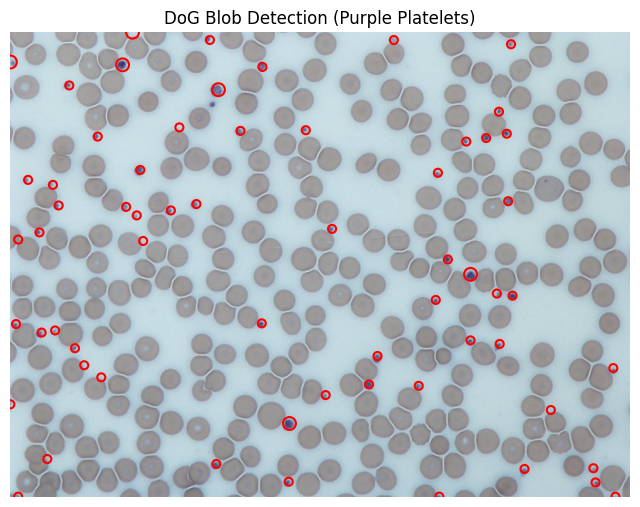

In [ ]:
# Convert to HSV (Hue, Saturation, Value) for better color segmentation
hsv = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2HSV)

# Extract only the saturation and value channels (ignoring hue)
saturation = hsv[:, :, 1]
value = hsv[:, :, 2]

# Enhance Contrast using Adaptive Histogram Equalization
saturation_eq = exposure.equalize_adapthist(saturation, clip_limit=0.03)
value_eq = exposure.equalize_adapthist(value, clip_limit=0.03)

# Merge enhanced saturation and value channels
enhanced_image = (saturation_eq + value_eq) / 2

# Apply Difference of Gaussians (DoG) for Blob Detection
blobs_dog = blob_dog(enhanced_image, min_sigma=4, max_sigma=7, threshold=0.07)

# Convert radius to proper scale
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

# Plot detected blobs with blue circles
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, cmap='gray')
ax.set_title('DoG Blob Detection (Purple Platelets)')
ax.axis('off')

# Draw blue circles around detected blobs
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=1.5, fill=False)
    ax.add_patch(c)

plt.show()

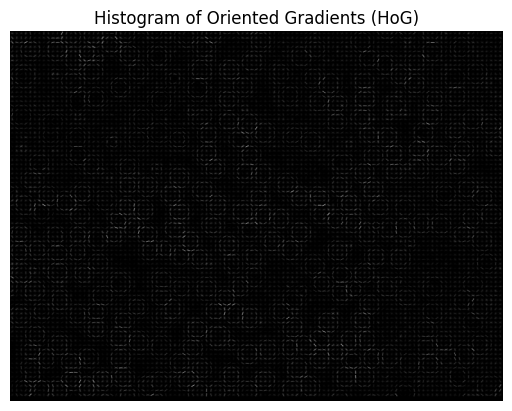

In [ ]:
from skimage.feature import hog

# Compute HOG
hog_features, hog_image = hog(image_eq, visualize=True, block_norm='L2-Hys')

# Show HoG result
plt.imshow(hog_image, cmap='gray')
plt.title('Histogram of Oriented Gradients (HoG)')
plt.axis('off')
plt.show()
